In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train,_ ), (x_test, _ ) = mnist.load_data() #no target variable 'y' here

#load data difly here, as its unsup learning , self-sup learning and will regen data / input from given data / input so target variable 'y' is not needed here

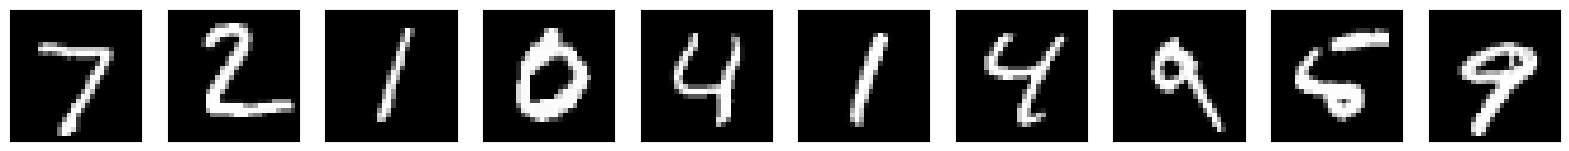

In [5]:
#display data

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(1,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [6]:
#scaling the data

x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255
x_train=x_train.reshape((len(x_train),28*28*1))
x_test=x_test.reshape((len(x_test),28*28*1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**Convolutional AutoEncoder**

In [7]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D , Flatten, Reshape
from tensorflow.keras.models import Model


**Architecture of AE**

In [14]:
input_layer_cnv = Input(shape=(28,28,1)) #input of AE , img

#Encoder , 32 : num of filter , decrease in encoder as compressing
ae_cnv_en = Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(input_layer_cnv) #end is input for that layer
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en) #input for this layer

ae_cnv_en = Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(ae_cnv_en) #end is input for that layer
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en) #input for this layer

ae_cnv_en = Conv2D(4, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(ae_cnv_en) #end is input for that layer
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en) #input for this layer

ae_cnv_en = Flatten(name='bot')(ae_cnv_en) #compressing / flattening the encoded data , bot as in bottleneck is name of the layer
#naming layers is useful, we can call it by name just to use that specific layer

#Decoder
#(4,4,4) means dim of decoder, 4x4x4=64 mastches the input_img_shape, as convo layer takes 2-D form not flatten form
ae_cnv_de = Reshape((4,4,4), input_shape = (64,), name= "botnext0")(ae_cnv_en) #input for this layer
ae_cnv_de = Conv2D(4, (3,3), activation='relu', padding='same', name = "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = "botnext2")(ae_cnv_de)

#number of filters are increasing here as upsampling, decoding
ae_cnv_de = Conv2D(32, (3,3), activation='relu', padding='same', name = "botnext3")(ae_cnv_de) #giving prev layer as input of this layer
ae_cnv_de = UpSampling2D((2,2), name = "botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D(32, (3,3), activation='relu', padding='valid', name = "botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = "botnext6")(ae_cnv_de)

#output layer definition
ae_cnv_de = Conv2D(1, (3,3), activation='sigmoid', padding='same', name = "botnext7")(ae_cnv_de) # using sigmoid for yes, no, either same img generated or not
Ae_Conv = Model(inputs = input_layer_cnv, outputs = ae_cnv_de) # defining model

#comiling model , 0.09 is learning rate , clip value is
Ae_Conv.compile(optimizer=tf.keras.optimizers.SGD(0.09, clipvalue=2.5), loss='binary_crossentropy', metrics=['accuracy'])

Ae_Conv.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext0 (Reshape)                   │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext1 (Conv2D)                    │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext2 (UpSampling2D)              │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext3 (Conv2D)                    │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext4 (UpSampling2D)              │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext5 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext6 (UpSampling2D)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext7 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,593 (84.35 KB)

 Trainable params: 21,593 (84.35 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#reshape data

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Training AEs**

In [ ]:
#self-sup learning so taking x-train as input and giving x-train as comparison for loss

In [16]:
from time import time
tic = time()
Ae_Conv.fit(x_train, x_train,
            epochs=100,
            verbose=2,
            batch_size=1024,
            shuffle=False, validation_split=0.1)
toc=time()
print("Training took {} Seconds".format(toc-tic))

Epoch 1/100
53/53 - 16s - 304ms/step - accuracy: 0.7985 - loss: 0.3536 - val_accuracy: 0.8086 - val_loss: 0.2600
Epoch 2/100
53/53 - 7s - 138ms/step - accuracy: 0.7968 - loss: 0.2407 - val_accuracy: 0.7815 - val_loss: 0.2269
Epoch 3/100
53/53 - 3s - 50ms/step - accuracy: 0.7886 - loss: 0.2198 - val_accuracy: 0.7965 - val_loss: 0.2135
Epoch 4/100
53/53 - 1s - 26ms/step - accuracy: 0.7878 - loss: 0.2109 - val_accuracy: 0.8001 - val_loss: 0.2112
Epoch 5/100
53/53 - 3s - 48ms/step - accuracy: 0.7884 - loss: 0.2054 - val_accuracy: 0.8002 - val_loss: 0.2076
Epoch 6/100
53/53 - 3s - 48ms/step - accuracy: 0.7889 - loss: 0.2015 - val_accuracy: 0.8010 - val_loss: 0.2047
Epoch 7/100
53/53 - 1s - 26ms/step - accuracy: 0.7895 - loss: 0.1984 - val_accuracy: 0.8019 - val_loss: 0.2020
Epoch 8/100
53/53 - 3s - 48ms/step - accuracy: 0.7901 - loss: 0.1956 - val_accuracy: 0.8024 - val_loss: 0.1989
Epoch 9/100
53/53 - 1s - 28ms/step - accuracy: 0.7908 - loss: 0.1930 - val_accuracy: 0.8038 - val_loss: 0.198

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Recreated img rep of shape {} using decodeer and reduced img rep using encoder.


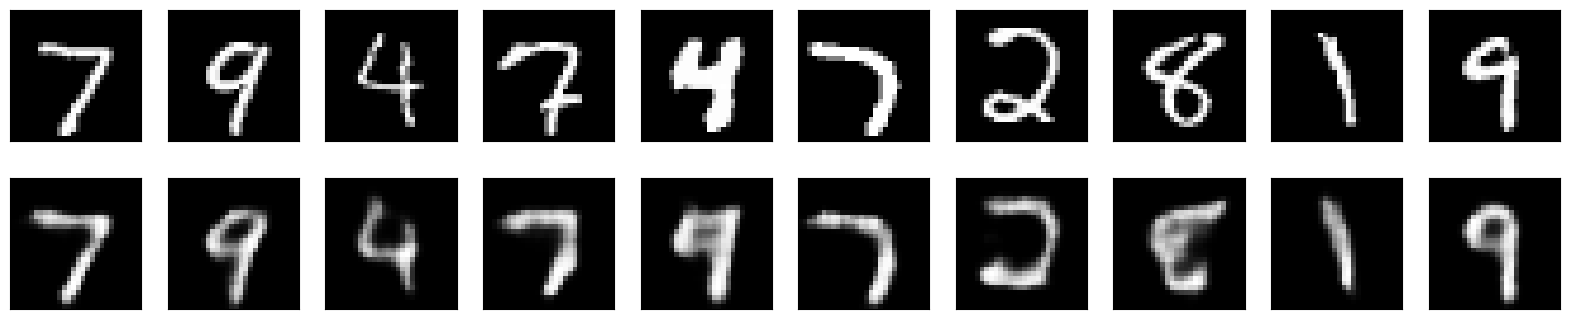

In [17]:
#predicting using both encoder and decoder together

decoded_imgs = Ae_Conv.predict(x_test)
print("Recreated img rep of shape {} using decodeer and reduced img rep using encoder.")

n=10
k=12 # multiplier
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    #displaying reconstruction
    ax=plt.subplot(2 ,n , i+1+n)
    plt.imshow(decoded_imgs[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The images are regenerated pretty well but its not trained that complex sothey are noisy , hyperparameter tuning will make it much better


In [ ]:
# you can use encoder and decoder seperately by accessing their layers individually
'''
#Encoder:
ae_conv_encoder = Model(inputs=input_layer_cnv, outputs=Ae_Conv.get_layer('bot').output, name='AE_Conv_encoder') #calling layer by name 'bot'
ae_conv_encoder.summary()

#Decoder:
encdoe_inp_cnv = Input(shape = (64,)) #giving input to decoder as encoded data
tmp_dec = Ae_Conv.get_layer('botnext0')(encdoe_inp_cnv)
for i in range(1,8): # accessing layer 1 to 8 via loop
  st='botnext{}'.format(i)
  tmp_dec = Ae_Conv.get_layer(st)(tmp_dec)

ae_conv_decoder = Model(inputs=encdoe_inp_cnv, outputs=tmp_dec, name = 'AE_Conv_decoder')
ae_conv_decoder.summary()
'''

#we can use them now without need to train them , and we can use e&d representations with any other classifier after them for a specific purpose

**Denoising AE**

Here difference is the data, we need noisy data , we'll add noise to the data

In [18]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [19]:
#Adding noise to the data
noise_factor = 0.5 #adding noise to test,train using numpy random function
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train_noisy.shape)
print(x_test_noisy.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Line-by-Line Explanation:**

**1. `noise_factor = 0.5`**
   - This line defines a variable `noise_factor` and assigns it a value of 0.5. This factor will be used to control the intensity of the noise added to the training and testing data.

**2. `x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)`**
   - This line adds noise to the training data `x_train`.
     - `np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)`: This part generates random noise with a mean of 0 and a standard deviation of 1. The `size` parameter ensures that the noise has the same shape as the `x_train` data.
     - `noise_factor * ...`: This scales the generated noise by the `noise_factor` (0.5 in this case).
     - `x_train + ...`: The scaled noise is added to the original training data `x_train`.

**3. `x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)`**
   - This line is similar to the previous one but adds noise to the testing data `x_test`.

**4. `x_train_noisy = np.clip(x_train_noisy, 0., 1.)`**
   - This line clips the values in `x_train_noisy` to the range [0, 1]. This ensures that the pixel values of the images remain within the valid range, preventing potential issues during training or prediction.

**5. `x_test_noisy = np.clip(x_test_noisy, 0., 1.)`**
   - This line does the same clipping operation for the `x_test_noisy` data.

**6. `print(x_train_noisy.shape)`**
   - This line prints the shape of the `x_train_noisy` array, which will be the same as the original `x_train` array.

**7. `print(x_test_noisy.shape)`**
   - This line prints the shape of the `x_test_noisy` array, which will be the same as the original `x_test` array.




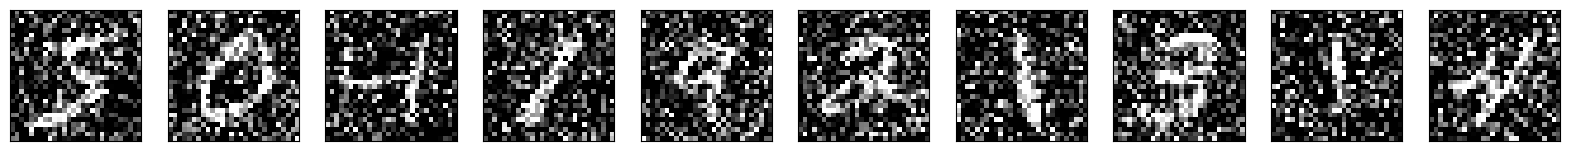

In [20]:
#Displaying noisy data

n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(1,n,i+1)
    plt.imshow(x_train_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

**Architecture [exactly as above]**

In [22]:
input_layer_cnv = Input(shape=(28,28,1)) #input of AE , img

#Encoder , 32 : num of filter , decrease in encoder as compressing
ae_cnv_en = Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(input_layer_cnv) #end is input for that layer
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en) #input for this layer

ae_cnv_en = Conv2D(32, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(ae_cnv_en) #end is input for that layer
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en) #input for this layer

ae_cnv_en = Conv2D(4, (3,3), activation='relu', padding='same', kernel_initializer='he_normal')(ae_cnv_en) #end is input for that layer
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en) #input for this layer

ae_cnv_en = Flatten(name='bot')(ae_cnv_en) #compressing / flattening the encoded data , bot as in bottleneck is name of the layer
#naming layers is useful, we can call it by name just to use that specific layer

#Decoder
#(4,4,4) means dim of decoder, 4x4x4=64 mastches the input_img_shape, as convo layer takes 2-D form not flatten form
ae_cnv_de = Reshape((4,4,4), input_shape = (64,), name= "botnext0")(ae_cnv_en) #input for this layer
ae_cnv_de = Conv2D(4, (3,3), activation='relu', padding='same', name = "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = "botnext2")(ae_cnv_de)

#number of filters are increasing here as upsampling, decoding
ae_cnv_de = Conv2D(32, (3,3), activation='relu', padding='same', name = "botnext3")(ae_cnv_de) #giving prev layer as input of this layer
ae_cnv_de = UpSampling2D((2,2), name = "botnext4")(ae_cnv_de)

ae_cnv_de = Conv2D(32, (3,3), activation='relu', padding='valid', name = "botnext5")(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name = "botnext6")(ae_cnv_de)

#output layer definition
ae_cnv_de = Conv2D(1, (3,3), activation='sigmoid', padding='same', name = "botnext7")(ae_cnv_de) # using sigmoid for yes, no, either same img generated or not
Ae_Conv_denoise = Model(inputs = input_layer_cnv, outputs = ae_cnv_de) # defining model

#comiling model , 0.09 is learning rate , clip value is
Ae_Conv_denoise.compile(optimizer=tf.keras.optimizers.SGD(0.09, clipvalue=2.5), loss='binary_crossentropy', metrics=['accuracy'])

Ae_Conv_denoise.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext0 (Reshape)                   │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext1 (Conv2D)                    │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext2 (UpSampling2D)              │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext3 (Conv2D)                    │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext4 (UpSampling2D)              │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext5 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext6 (UpSampling2D)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext7 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,593 (84.35 KB)

 Trainable params: 21,593 (84.35 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
#training DAE

from time import time
tic = time()
Ae_Conv_denoise.fit(x_train_noisy, x_train, #input is noisy data and for loss comparison actual clean data
            epochs=100,
            verbose=2,
            batch_size=256,
            shuffle=False, validation_split=0.1)
toc=time()
print("Training took {} Seconds".format(toc-tic))

Epoch 1/100
211/211 - 9s - 42ms/step - accuracy: 0.7941 - loss: 0.2843 - val_accuracy: 0.8026 - val_loss: 0.2455
Epoch 2/100
211/211 - 4s - 20ms/step - accuracy: 0.7933 - loss: 0.2372 - val_accuracy: 0.7936 - val_loss: 0.2264
Epoch 3/100
211/211 - 2s - 12ms/step - accuracy: 0.7919 - loss: 0.2243 - val_accuracy: 0.7975 - val_loss: 0.2191
Epoch 4/100
211/211 - 2s - 9ms/step - accuracy: 0.7920 - loss: 0.2156 - val_accuracy: 0.7965 - val_loss: 0.2091
Epoch 5/100
211/211 - 2s - 11ms/step - accuracy: 0.7932 - loss: 0.2066 - val_accuracy: 0.7963 - val_loss: 0.1996
Epoch 6/100
211/211 - 3s - 12ms/step - accuracy: 0.7945 - loss: 0.1985 - val_accuracy: 0.7971 - val_loss: 0.1924
Epoch 7/100
211/211 - 2s - 8ms/step - accuracy: 0.7958 - loss: 0.1920 - val_accuracy: 0.7979 - val_loss: 0.1864
Epoch 8/100
211/211 - 3s - 12ms/step - accuracy: 0.7968 - loss: 0.1869 - val_accuracy: 0.7986 - val_loss: 0.1820
Epoch 9/100
211/211 - 3s - 13ms/step - accuracy: 0.7976 - loss: 0.1830 - val_accuracy: 0.7994 - va

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Recreated img rep of shape {} using decoder and reduced img rep using encoder.


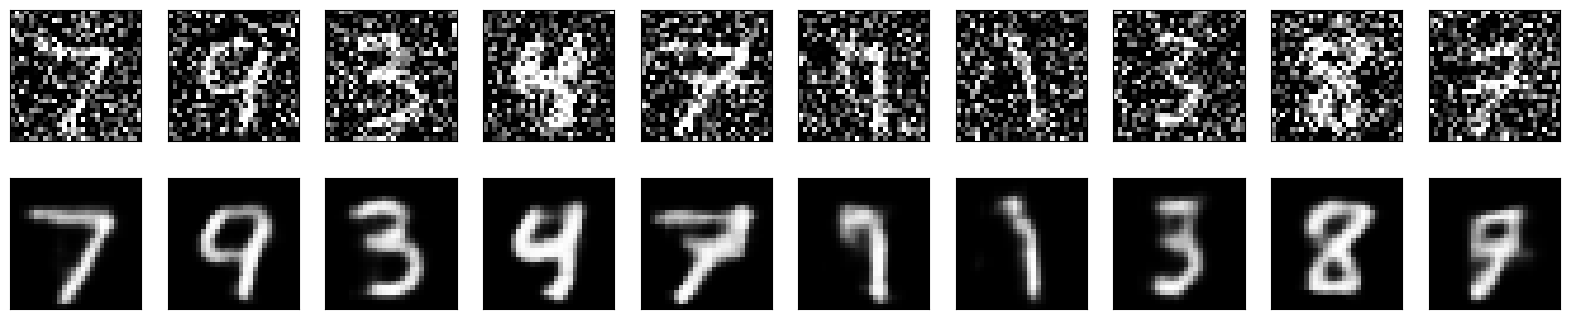

In [25]:
#predicting using both encoder and decoder together

dns_decoded_image= Ae_Conv_denoise.predict(x_test_noisy)
print("Recreated img rep of shape {} using decoder and reduced img rep using encoder.")

n=10
k=16 # multiplier
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(x_test_noisy[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


    #displaying reconstruction
    ax=plt.subplot(2 ,n , i+1+n)
    plt.imshow(dns_decoded_image[i*k].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Overall Impact of k:

A higher k value will select images further apart in the x_test_noisy and dns_decoded_image arrays. This means you'll see reconstructions for images that are spaced farther apart in the original test data.
A lower k value (like 1) would display images closer together in the sequence, potentially showing reconstructions for consecutive images.
In essence, k controls the sampling frequency of the images you visualize, allowing you to choose specific pairs or show them with different spacing within the test data.